# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 5 (Thu)**


### Student Information 

_Full Name (Last Name, First Name)_: Rangel, Jerico Miguel\
_Student No._: 2018-11666\
_Section_: WFU-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Jerico Miguel Tapang Rangel** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/20
* Problem 2 - []/30
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


1. Firstly I imported numpy for array definition and cmath for sin,exp, and pi that are applicable to complex analysis. I define the given sine wave function $y_{n}$ and define an empty array **coeff** to store the fourier coefficients $c_{n}$. This array has a length N/2 + 1 since these are the only values we will need. The other half are just complex conjugates of the ones calculated. The coefficients are solved using a simple summation loop using the formula. They can then be printed to see the values.  

2. I import pylab as py and use the functions plot and show to see the desired graph. This is done by taking the absolute values of each coefficient to see their corresponding amplitudes. The graph is labelled with the necessary info.

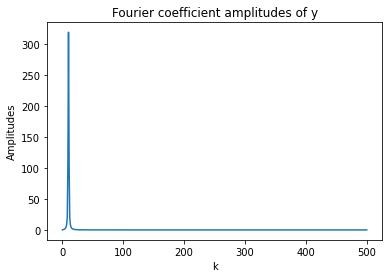

In [60]:
import numpy as np
import pylab as py
from cmath import sin,exp,pi
N=1000
j=complex(0,1)
divs = int((N/2)+1)
def f(n):
  return (sin((pi*n)/N))*sin((20*pi*n)/N) 
coeff = np.zeros(divs, complex)
for k1 in range(1,divs):
  for k in range(1,N):
    coeff[k1] += (f(k))*(exp(-(2*j*pi*k1*k)/N))
#print(coeff)
py.plot(abs(coeff))
py.title("Fourier coefficient amplitudes of y")
py.xlabel("k")
py.ylabel("Amplitudes")
py.show()

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

 Admin					 Research
'Colab Notebooks'			 Talks
'Copy of PGH_COVID_LessonsLearned.pdf'	 Teaching
'NIP Letter Head Form.docx'		'Untitled spreadsheet.gsheet'


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
``` 

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

1. After importing the data from google drive, I use pylab's plot and show function to display the graph. The necessary labels are also added.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


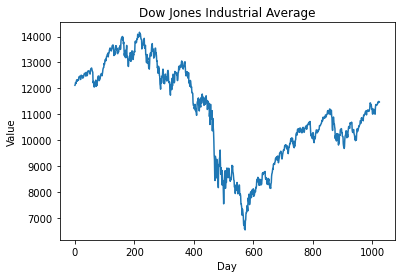

In [61]:
from google.colab import drive
import numpy as np
import pylab as py

drive.mount("/content/drive")
#!ls drive/My\ Drive
file_path = "/content/drive/My Drive/"
dow = np.loadtxt(file_path + "dow.txt")
#dow[0:10]

py.plot(dow)
py.title("Dow Jones Industrial Average")
py.xlabel("Day")
py.ylabel("Value")
py.show()

2. I use rfft from numpy's fft library and use it to take the discrete fourier transform of the given dataset. This can then be printed to see the values.

In [62]:
from numpy.fft import rfft, irfft
c=rfft(dow)
#print(c)

3. To set the last 90% of the values to zero, I use a simple for and if loop to check whether the value index is more than 10% of the total length. If this is true, the value is set to zero for that index. 

4. I take the inverse fast fourier transform of the resulting array using numpy's irfft function and plot this using pylab. The necessary labels are added to be able to compare this graph to the previous one. It can be seen that the filtered data's plot is smoother and follows the same trends as that of the original curve. It is as if the values were averaged and given a very accurate trendline curve. This is thanks to the filtering process done earlier by zero-ing out the last 90% elements of the array **c**, which is the array resulting from the discrete fourier transform of the original dataset. Zero-ing out these values corresponds to removing values with lower absolute amplitudes which corresponds to removing noise in the original graph. 

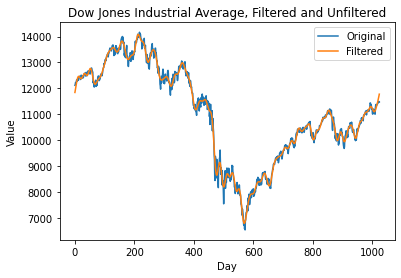

In [63]:
for k in range(0,len(c)):
  if k>0.1*(len(c)):
    c[k]=0
#print(c)
d = irfft(c)

py.plot(dow, label='Original')
py.plot(d, label='Filtered')
py.legend(loc='upper right', frameon='true')
py.title("Dow Jones Industrial Average, Filtered and Unfiltered")
py.xlabel("Day")
py.ylabel("Value")
py.show()

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

1. After importing the dataset, I used pylab's imshow to display the image.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


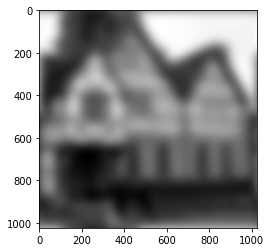

In [64]:
from google.colab import drive
import numpy as np
import pylab as py

drive.mount("/content/drive")
#!ls drive/My\ Drive
file_path = "/content/drive/My Drive/"
blur = np.loadtxt(file_path + "blur.txt")

py.imshow(blur, cmap='gray')


2. To create an array of values corresponding to the point spread function, i defined the function and ran different value of x and y through the whole domain and range of the image. This includes value from -512 to 512 both along the x and along the y axes. These values are stored in the 2d-array called **spread**. 

3. I use imshow to display the density plot of the point spread function and set the necessary x and y limits to see the trend. This manifests as the white corners in which the values appraoach zero as $x^2$ and $y^2$ both get very high values.

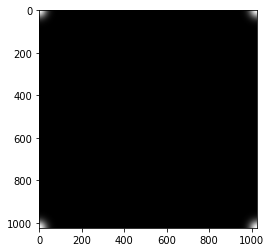

In [65]:
from math import exp
def f(x,y):
  return 1/(exp((x**2 + y**2)/(2*25**2)))
divs = len(blur)
spread = np.zeros([divs,divs],float)
for k1 in range(-divs//2,divs//2):
  for k2 in range (-divs//2,divs//2):
    spread[k1,k2] = f(k1,k2)

py.xlim(0,divs)
py.ylim(divs,0)
py.imshow(spread, cmap='gray') 

4. I follow the process by first taking the 2d discrete fourier transforms of both the original image and the spread distribution. Then I define a complex 2d array **f3** to take the value acquired by dividing the first fourier transform array by the other one. To avoid division by zero, a minimum value of $10^-3$ is checked for before proceeding to division. The last step is to take the inverse fourier transform of **f3** and to display the image, which is now seen to be clearer and sharper compared to the original.

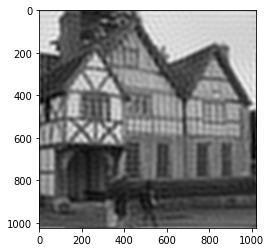

In [66]:
from numpy.fft import rfft2,irfft2
f1 = rfft2(blur)
f2 = rfft2(spread)
f3 = np.zeros([divs,divs//2],complex)

for m1 in range(-divs//2,divs//2):
  for m2 in range(-divs//2,divs//2):
    if f2[m1,m2] >10**-3:
      f3[m1,m2] = f1[m1,m2]/f2[m1,m2]
    else:
      f3[m1,m2] = f1[m1,m2]

unblurred = irfft2(f3) 
py.imshow(unblurred, cmap='gray')